# ヒストグラム その1: 計算して，プロットして，解析する !!!

## 理論

ヒストグラムとは、<b>画像中の画素値の全体的な分布を知るためのグラフやプロット</b>と考えることができる．横軸に画素値(大抵の場合0から255の値を持つ)，縦軸に画素値の出現頻度をプロットしたものである．ヒストグラムをこのように可視化することは、画像を理解する一つの方法である．ヒストグラムを見れば画像のコントラスト，明るさ，画素値の分布などが直観的に理解できるからである．今日利用できる画像処理ソフトのほとんどがヒストグラムに関する機能を持っている．次に示す画像は Cambridge in Color website から取り出したものの1枚である．詳細についてはサイトを参照すること．

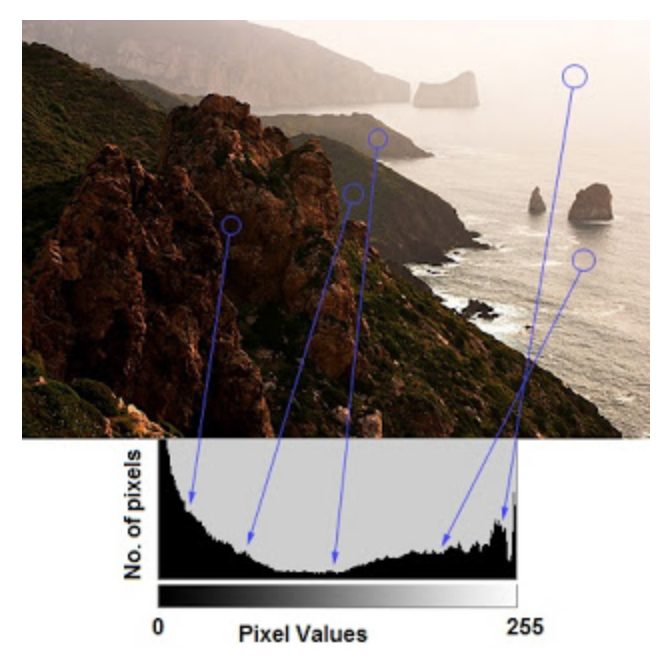

画像とそのヒストグラムを比べてみよう(このヒストグラムはグレースケール画像のヒストグラムであり，カラー画像のヒストグラムではないことに注意)．ヒストグラムの左側の領域は画像の中の暗い画素の出現頻度，右側の領域は画像の中の明るい画素の出現頻度を表している．このヒストグラムから、この画像は暗い領域の方が多いことや、画素値の中間領域(ここでは127付近)の画素はほとんどないことなどが分かる．



In [11]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


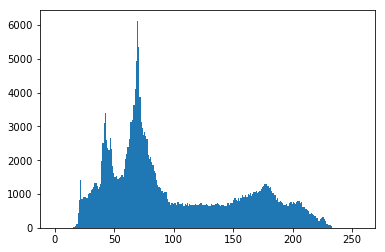

In [12]:
img = cv2.imread('../../img/hari.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.hist(img.ravel(),256,[0,256]); plt.show()

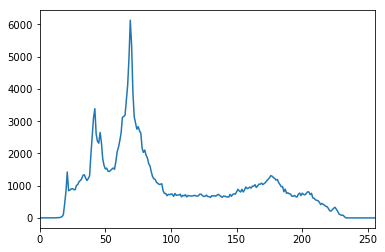

In [14]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

Series(hist).plot()

# ヒストグラムの可視化

## 1. Matplotlibを使う

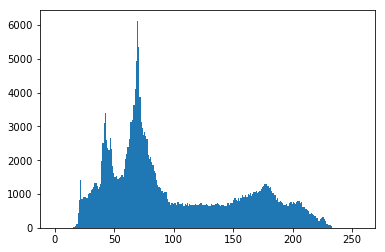

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

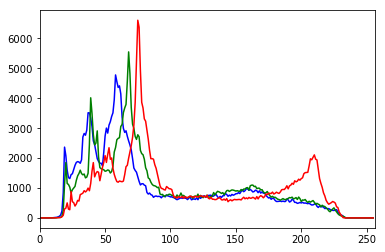

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


## 2. OpenCVを使う

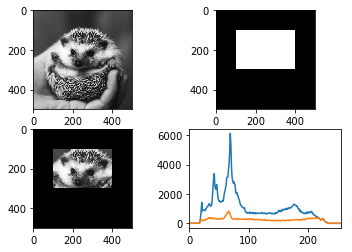

In [17]:
img = cv2.imread('../../img/hari.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

# ヒストグラム その2: ヒストグラム平坦化

## 理論

画素値が特定の範囲に集中している画像を考えてみよう．例えば明るい画像は画素値が高い範囲に集中している．しかし，良い画像とは、画素値が全範囲に万遍なく分布しているものである．良い画像を得るにはこのヒストグラムを両側に向けて伸ばす必要があり，これがまさにヒストグラム平坦化の処理になる．この処理によって画像のコントラストが改善される．



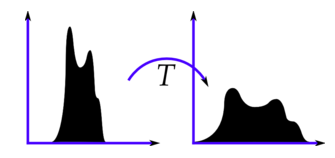

詳細な説明に関しては，Wikipediaの ヒストグラム平坦化 に関する記事を読むことをお勧めする．例を示しながら詳しく説明してあるので，よくわかるであろう．

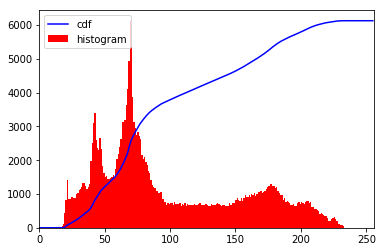

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

ヒストグラムが明るい領域に集中していることが分かる．そこで、原画像で明るい領域に集中している画素を全範囲に分布させるために変換関数が必要である．これがヒストグラム平坦化が行う処理である．

まずヒストグラムの最小値(0ではない)を見つけ，wikipediaのページに書いてあるヒストグラム平坦化の式を適用する．ここでNumpyのマスクした配列の概念を使いる．マスクした配列に対しては，処理はすべてマスクされていない要素にだけ作用する．詳しくはNumpyのドキュメントマスクした配列(masked arrays)を参照せよ．

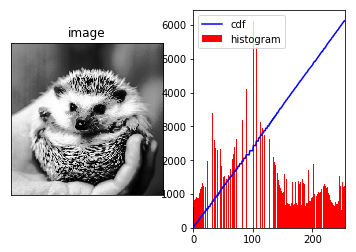

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.subplot(1,2,1),plt.imshow(img2,cmap='gray')
plt.xticks([]),plt.yticks([]),plt.title('image')
plt.subplot(1,2,2),plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

もう一つの重要な特徴に，もしも入力画像が例に使用した明るい画像ではなく全体的に暗い画像だったとしても，ヒストグラム平坦化によって得られる結果はほとんど同じような画像になることがある．結果として全ての画像を同じような光源環境で撮影した画像へ変換する “参照ツール” とも言える．これは様々なケースで役に立る．例えば，顔認識を行う際に，顔画像データベースを使った学習を行う前に全データに対してヒストグラム平坦化を行い光源環境を揃えることができる．



## OpenCVを使ったヒストグラム平坦化

OpenCVはヒストグラム平坦化を使うための cv2.equalizeHist() 関数を用意している．これはグレースケール画像を入力とし，ヒストグラム平坦化された画像を出力する．

同じ画像に対して cv2.equalizeHist() を適用した結果を示する 

(500, 1000, 3)


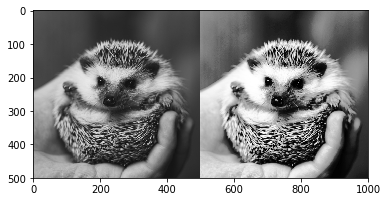

In [22]:
img = cv2.imread('../../img/hari.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
res = cv2.cvtColor(res, cv2.COLOR_GRAY2RGB) #ここ！！

print(res.shape)
plt.plot(), plt.imshow(res)
plt.show()

これでいろいろな光源環境で撮られた画像に対して，コントラストを向上させ，その結果を確認できるようになった．

ヒストグラム平坦化はヒストグラムが特定の範囲に集中している時に効果を発揮する．その一方で，ヒストグラムが広範囲に分布しているような画像に対してはうまく機能しないことに注意しよう．補足資料に載せたStackOverflowのページを参照してください．

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

最初に紹介したヒストグラム平坦化は画像全体のコントラストを考慮した処理である．多くの場合に、このアイディアはあまり上手くいかない．例えば、次に示す画像は入力画像とヒストグラム平坦化の結果の画像である．

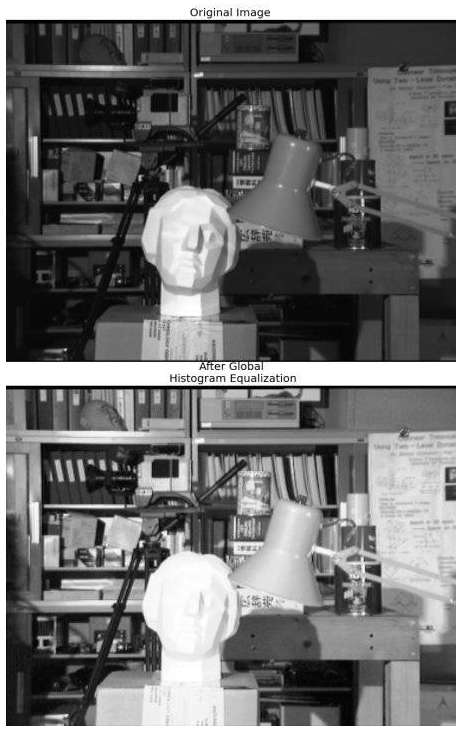

背景領域のコントラストは向上したものの，胸像の顔を見ると過度に明るくなってしまったため、細部情報が失われている．これは，入力画像のヒストグラムが特定の範囲に偏っていないことが原因である(入力画像のヒストグラムをプロットしてみよ)．

この問題を解決するためには 適応的ヒストグラム平坦化 をしなければならない．この処理は，画像を “タイル(tiles)” (OpenCVのデフォルトでは8x8)と呼ばれる小領域に分割し，領域毎にヒストグラム平坦化を適用するものである．(ノイズが無ければ)小領域中ではヒストグラムが小さい範囲に集中すると仮定している．ノイズがある場合，ノイズが強調されてしまうことがある．これを防ぐために コントラストの制限 を適用する．もしもビンの出現頻度が特定の上限値(OpenCVのデフォルトでは40)を超えた場合，上限値を超える画素はその他のビンに均等に分配され，その後にヒストグラム平坦化を適用する．平坦化の適用後にタイルの境界に生じる疑似輪郭を消すためにbilinearの内挿をする．

以下のコードがOpenCVでCLAHE(コントラスト制限付き適応的ヒストグラム平坦化)を適用するためのコード

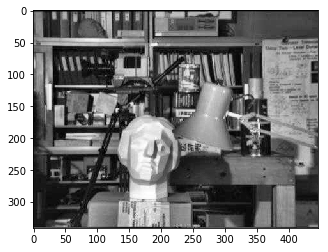

In [25]:
import numpy as np
import cv2

img = cv2.imread('../../img/tsukuba_l.png',0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cl1 = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB) #ここ！！

plt.plot(), plt.imshow(cl1)
plt.show()


上の結果(特に胸像の領域)と次の結果を比較しよう:

